# Hands-on introduction to Random Variables and Sampling

###### Author and Instructor: __Matei Iordanescu__
Concepts:

 1) Probabilities and Random Variables
    - Concept 1: Real Life Examples of Random Variables
    - Concept 2: What is a Random Variable?
    - Concept 3: Vocabulary - Stochastic vs Deterministic
    - Concept 4: PDF vs CDF
 2) Normal Distributions
    - Concept 1: What is the Exponential Function?
    - Concept 2: The Normal Distribution
 3) Sampling
    - Concept 1: What Is Sampling and Why Do We Sample
    - Concept 2: Sampling from a Normal Distribution
    - Concept 3: Sampling from an Arbitrary PDF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import uniform, bernoulli, binom

## 1: Probabilities and Random Variables

### Context:

Why should we care? A random variable is useful because it lets us represent uncertain outcomes with numbers so we can analyze them mathematically. For example, when flipping a coin or rolling a die, the result is random, but we can assign it a value to calculate things like averages or probabilities. This helps us understand patterns in data, make predictions, and compare results across different situations. Without random variables, it would be hard to apply math to uncertain events.

### Concept 1: Real Life Examples
Many phenomena in nature can not be described by just one number.
A random variable is a variable whose possible values are outcomes of a random process. It can be discrete (like dice or coin flips) or continuous (like temperature or time).

#### Examples:

##### What is the outcome of a coin flip? Is is heads or tails? (Discrete Binary Random Variable)

In [2]:
coin_flips = np.random.choice(['Heads', 'Tails'], size=1000)
print("Coin Flips:", coin_flips[:10])

Coin Flips: ['Heads' 'Heads' 'Tails' 'Heads' 'Tails' 'Heads' 'Tails' 'Heads' 'Tails'
 'Tails']


  
##### What face will you get if you roll a dice? (Discrete Uniform Random Variable)

In [3]:
dice_min_value = 0
dice_max_value =6
samples_count = 1000
dice_rolls = np.random.randint(dice_min_value, (dice_max_value+1), size=samples_count)
print("Dice Rolls:", dice_rolls[:10])

Dice Rolls: [2 3 3 2 5 1 0 0 6 0]



##### What is your body temperature if we measure it multiple times with a high precision thermometer? (Continuous Random Variable)

In [4]:
temps = np.random.normal(loc=98.6, scale=.01, size=5000)
print(temps[:10])

[98.60024435 98.59451241 98.59359122 98.59727853 98.57996566 98.60069357
 98.60257915 98.59493411 98.62926781 98.60323164]



##### What will be the stopping angle of a spinning wheel? (Continuous Uniform Random Variable)

In [5]:
spinning_wheel_angle = np.random.uniform(0, 360, size=1000)
print(spinning_wheel_angle[:10])

[ 90.89038428 271.75235834  58.85182974 218.69118008 177.34561096
 257.57210718 170.1951716  345.79812254 333.04119488 189.5060673 ]


### Concept 2: So what is a Random Variable?

A random variable is a variable that can take on multiple possible values, each associated with a specific probability. The full set of value-probability pairs together define the random variable. Formally, a random variable consists of the full set of such pairs where the probabilities are non-negative and sum to 1.

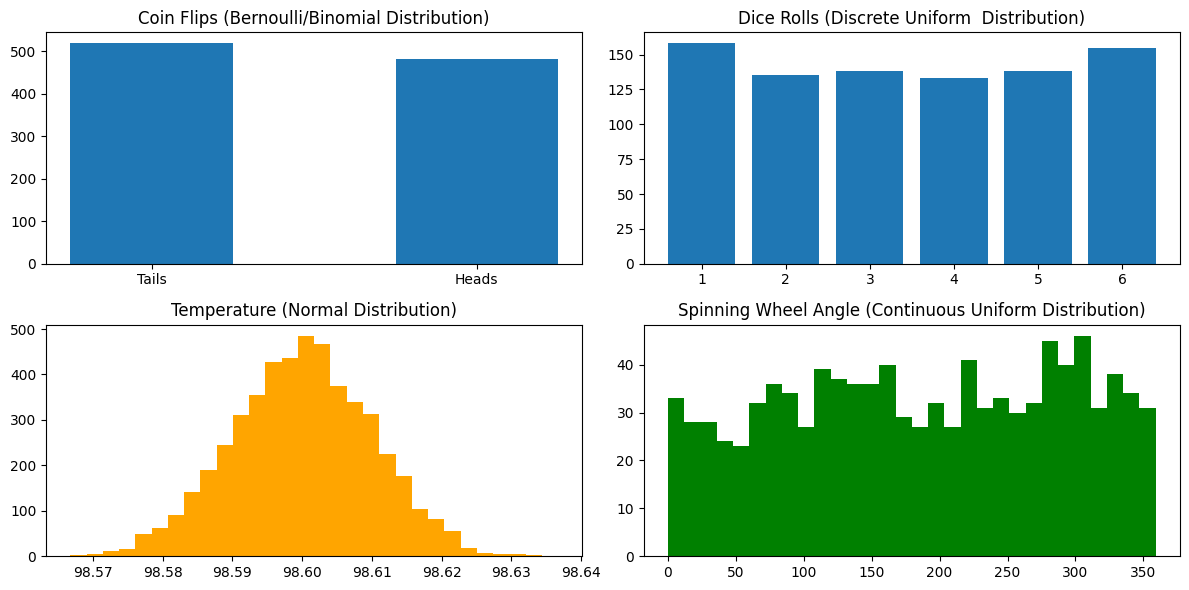

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist([1 if flip=='Heads' else 0 for flip in coin_flips], bins=2, rwidth=0.5)
plt.title("Coin Flips (Bernoulli/Binomial Distribution)")
plt.xticks([0.25, 0.75], ['Tails', 'Heads'])
plt.subplot(2, 2, 2)
plt.hist(dice_rolls, bins=np.arange(1, 8)-0.5, rwidth=0.8)
plt.title("Dice Rolls (Discrete Uniform  Distribution)")
plt.xticks(range(1, 7))
plt.subplot(2, 2, 3)
plt.hist(temps, bins=30, color='orange')
plt.title("Temperature (Normal Distribution)")
plt.subplot(2, 2, 4)
plt.hist(spinning_wheel_angle, bins=30, color='green')
plt.title("Spinning Wheel Angle (Continuous Uniform Distribution)")
plt.tight_layout()
plt.show()

### Concept 3: Vocabulary - Stochastic vs Deterministic
To distinguish between these two types of measurements, we use the following terms:
- Stochastic: Involves randomness; outcomes can vary even with the same setup (e.g., a coin flip or rolling a die).
- Deterministic: Produces the same outcome every time given the same input (e.g., flipping a two-headed coin).

##### Examples: 
 - Stochastic process: How many heads and how many tails will I get when I flip a coin 10 times and I repeat this experiment twice?  

 - Deterministic process: The above experiment becomes deterministic if I use a special coin that has Heads on both faces.

__DEMO__:

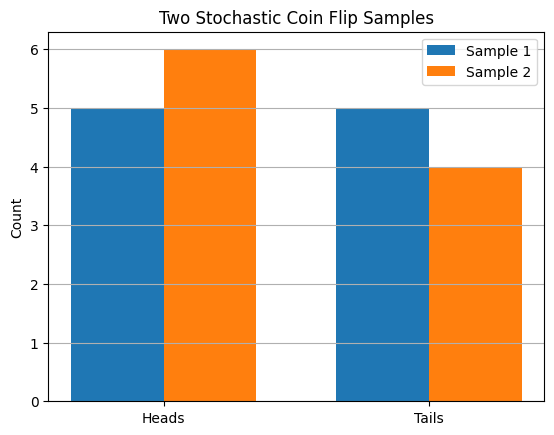

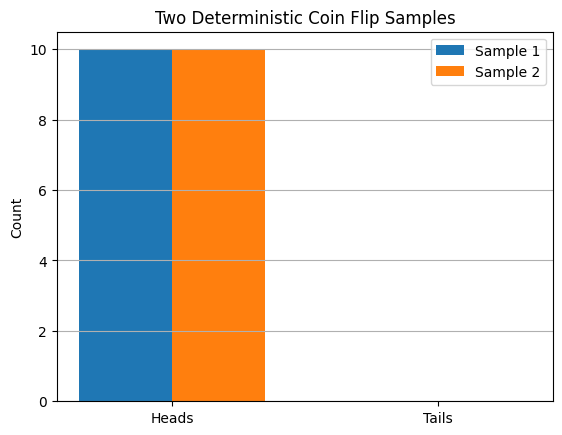

In [7]:
# Stochastic process: 
example1 = np.random.choice(['Heads', 'Tails'], size=10)
example2 = np.random.choice(['Heads', 'Tails'], size=10)

counts1 = {'Heads': np.sum(example1 == 'Heads'), 'Tails': np.sum(example1 == 'Tails')}
counts2 = {'Heads': np.sum(example2 == 'Heads'), 'Tails': np.sum(example2 == 'Tails')}

labels = ['Heads', 'Tails']
values1 = [counts1['Heads'], counts1['Tails']]
values2 = [counts2['Heads'], counts2['Tails']]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values1, width, label='Sample 1')
bars2 = ax.bar(x + width/2, values2, width, label='Sample 2')
ax.set_ylabel('Count')
ax.set_title('Two Stochastic Coin Flip Samples')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(axis='y')
plt.show()


# Deterministic process (same code as above, bu use a coin with 2 heads faces):
example1 = np.random.choice(['Heads'], size=10)
example2 = np.random.choice(['Heads'], size=10)

counts1 = {'Heads': np.sum(example1 == 'Heads'), 'Tails': np.sum(example1 == 'Tails')}
counts2 = {'Heads': np.sum(example2 == 'Heads'), 'Tails': np.sum(example2 == 'Tails')}

labels = ['Heads', 'Tails']
values1 = [counts1['Heads'], counts1['Tails']]
values2 = [counts2['Heads'], counts2['Tails']]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values1, width, label='Sample 1')
bars2 = ax.bar(x + width/2, values2, width, label='Sample 2')
ax.set_ylabel('Count')
ax.set_title('Two Deterministic Coin Flip Samples')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(axis='y')
plt.show()

### Concept 4: PDF vs CDF
Probability distributions describe how likely different outcomes are in a random process. Remember, a random variable is a list of all possible values and the probbaility of each value.  
For example, for a coin flip, we have:  
 - heads: probability .5 (or for example .6 for a non fair coin)
 - tails: probability .5 (or .4 for the non fair coin)

For continuous variables, we cannot list all the values. So we use a function with the same domain as the random variable and whose area under the curve between points a and b in the domain is equal to the probablity of getting a value >= a and <b. This function is called a Probability Density Function (__PDF__).
  
A PDF :
 - must have a total area under the curve equal to 1
 - never dip below the x-axis since probabilities can’t be negative.

A Cumulative Distribution Function (__CDF__) is similar to a PDF but while the PDF shows the probability of getting a value in a certain range, the CDF is a function such that CDF(x) is equal to the probability of getting a value smaller than x. Consequently, it always increases and eventually reaches 1 when x is at the maximum value. A CDF at a certain value "a" is the area from the PDF from the minimum range value until the threshold "a".

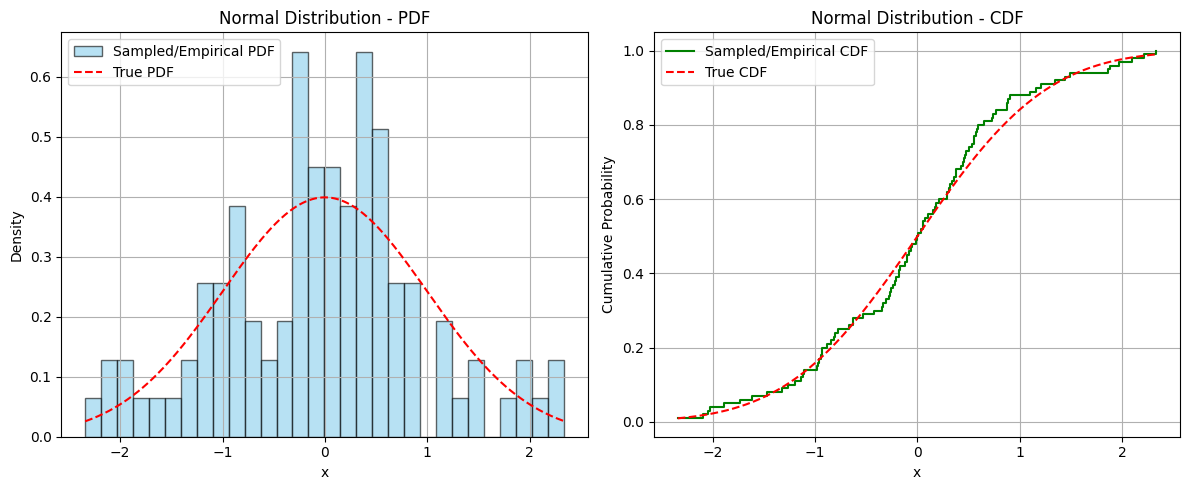

In [8]:
# Generate random samples from a normal distribution
mu, sigma = 0, 1
samples = np.random.normal(mu, sigma, size=100)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
count, bins, _ = plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sampled/Empirical PDF')
x = np.linspace(min(bins), max(bins), 300)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='True PDF')
plt.title("Normal Distribution - PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# CDF from samples
plt.subplot(1, 2, 2)
sorted_samples = np.sort(samples)
ecdf_y = np.arange(1, len(sorted_samples) + 1) / len(sorted_samples)
plt.step(sorted_samples, ecdf_y, label='Sampled/Empirical CDF', color='green', where='post')
plt.plot(x, norm.cdf(x, mu, sigma), 'r--', label='True CDF')
plt.title("Normal Distribution - CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

__Bonus Concept__:   
In addition to probability density functions (PDFs), probabilities can also be described using statistical measures. These include quantities such as the mean, range, standard deviation, variance, and median.

## 2: Normal Distributions

The normal distribution is a fundamental concept in statistics, valued for its broad applicability and important properties. Many real-world phenomena naturally follow a normal distribution, making it essential for understanding core statistical methods such as hypothesis testing, confidence intervals, and regression analysis. To build a clearer understanding of the normal distribution, it is helpful to first explore the exponential function, as the normal distribution is derived from it.  

NOTE: Normal may sound trivial but it refers to a specific distribution also called the Gaussian distribution (after [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/List_of_things_named_after_Carl_Friedrich_Gauss#:~:text=List%20of%20things%20named%20after%20Carl%20Friedrich%20Gauss%20%2D%20Wikipedia)). It is called normal not becasue it is trivial but becasue it describes many regular phenomena.

### Concept 1: What is the Exponential Function?

An exponential function describes the value we get when we use a constant (called **base**) and raise it to a variable exponent, commonly written as __f(x)=a^x__  
  
In this equation, __a__ is the base and it can be any positive and rational number, such as 2 or 10, and __x__ is the input value that varies.  
   
Among all exponential functions, __f(x)=e^x__, which uses the base __e__ (approximately equal to 2.718, and is an irrational number like PI), is widely used in engineering and science:

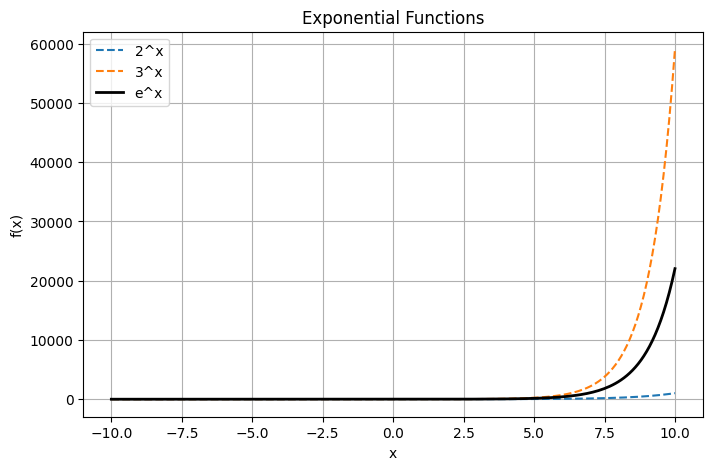

In [9]:
x = np.linspace(-10, 10, 200)
plt.figure(figsize=(8, 5))
plt.plot(x, np.power(2, x), label='2^x', linestyle='--')
plt.plot(x, np.power(3, x), label='3^x', linestyle='--')
plt.plot(x, np.exp(x), label='e^x', color='black', linewidth=2)

plt.title("Exponential Functions")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

### Concept 2: The Normal Distribution

The normal distribution is a bell-shaped curve that is described using the exponential function, specifically e^(0.5(−((x)^2))) multiplied by a constant (1/sqrt(2*Pi)).

The above equation describes the simplest normal distribution, with a mean of 0 and Standard deviation = 1 (previously mentioned statistics). When the mean is not 0 and the standard deviation is not 1, the equation becomes:  
e^(−((x−μ)^2)/(2σ^2))  
(and the multiplication constant  being now(1/(sigma * sqrt(2*Pi))) ).  
 
The mean (μ) sets the center, and the standard deviation (σ) controls the spread; larger σ means a wider curve, smaller σ means a sharper peak.

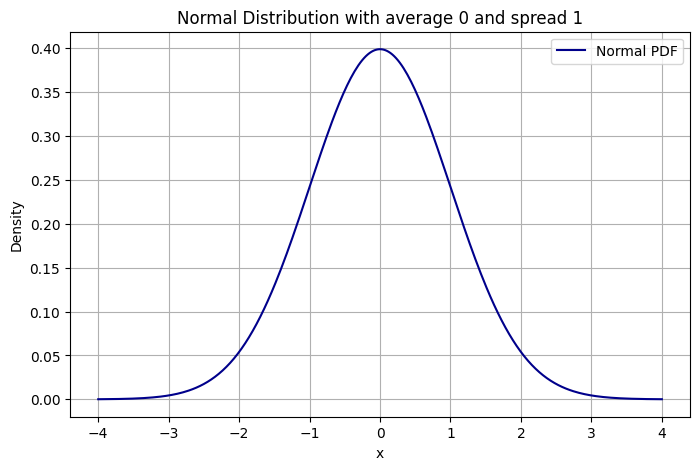

In [10]:
mu = 0
sigma = 1
x = np.linspace(-4, 4, 300)
normal_pdf = (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-((x - mu)**2) / (2 * sigma**2))

plt.figure(figsize=(8, 5))
plt.plot(x, normal_pdf, label='Normal PDF', color='darkblue')
plt.title("Normal Distribution with average 0 and spread 1")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


The reason for the multiplication constant in the normal distribution PDF, is to make sure its total area under the curve (AUC) is equal 1. this is needed since we know for sure the value will be in the range, and thus is a certain event with 100% probability.  

The shape of the Gaussian curve comes from the exponential part and this exponential term controls the curve’s shape, but by itself, its area under the curve is not 1. To fix that, we multiply it by the normalizing constant, which is: 1/sqrt(2πσ^2). This constant ensures the area under the entire curve is exactly 1, no matter what values of μ (mean) and σ (standard deviation) you use.  
  
  The value of the multiplication constant comes from solving the integral of the Gaussian function.

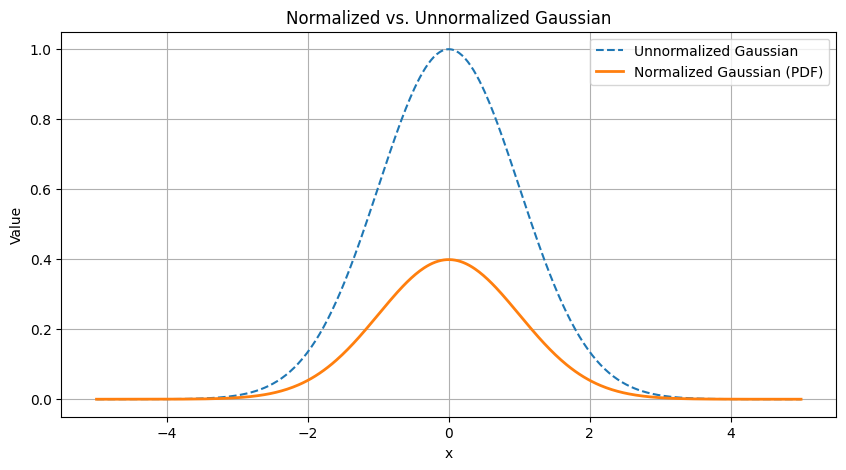

In [11]:
mu = 0
sigma = 1
x = np.linspace(-5, 5, 500)

# Unnormalized Gaussian
unnormalized = np.exp(-((x - mu)**2) / (2 * sigma**2))

# Normalized Gaussian (PDF)
normalized = (1 / (np.sqrt(2 * np.pi * sigma**2))) * unnormalized

plt.figure(figsize=(10, 5))
plt.plot(x, unnormalized, label='Unnormalized Gaussian', linestyle='--')
plt.plot(x, normalized, label='Normalized Gaussian (PDF)', linewidth=2)
plt.title("Normalized vs. Unnormalized Gaussian")
plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

__Bonus Concept__:   
Other commonly used probability distributions include the uniform, Bernoulli, and binomial distributions.

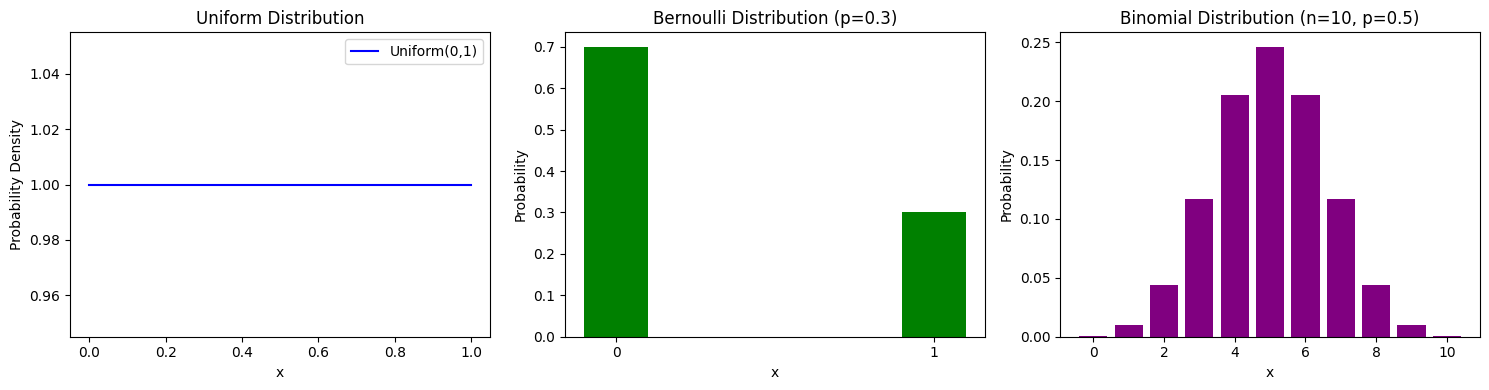

In [12]:
# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# 1. Uniform Distribution (Continuous)
x_uniform = np.linspace(0, 1, 100)
y_uniform = uniform.pdf(x_uniform, loc=0, scale=1)
axs[0].plot(x_uniform, y_uniform, label='Uniform(0,1)', color='blue')
axs[0].set_title('Uniform Distribution')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

# 2. Bernoulli Distribution (Discrete)
x_bern = [0, 1]
p = 0.3
y_bern = bernoulli.pmf(x_bern, p)
axs[1].bar(x_bern, y_bern, width=0.2, color='green')
axs[1].set_title('Bernoulli Distribution (p=0.3)')
axs[1].set_xticks([0, 1])
axs[1].set_xlabel('x')
axs[1].set_ylabel('Probability')

# 3. Binomial Distribution (Discrete)
n, p = 10, 0.5
x_binom = np.arange(0, n+1)
y_binom = binom.pmf(x_binom, n, p)
axs[2].bar(x_binom, y_binom, color='purple')
axs[2].set_title('Binomial Distribution (n=10, p=0.5)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('Probability')

plt.tight_layout()
plt.show()

## 3: Sampling

### Concept 1: What Is Sampling and Why Do We Sample
What is it?:

Sampling means picking values from a population with a certain probability distribution.  

We can do this by selecting individuals from the population or by using a computer program like we show here to generate samples from the PDF.    
  
Why?  
1) We can’t see everything:  
   In the real world, it's often impossible to measure an entire population (like every person on Earth, or every possible coin flip).

3) Sampling lets us estimate:  
   We collect a smaller set of values and use them to:  
    - Understand patterns  
    - Estimate averages  
    - Make predictions  
    - Compare outcomes  
.

3) In simulation:  
   We sample from a probability distribution to:  
    - Create synthetic data (e.g., 1000 dice rolls)  
    - Model uncertainty (e.g., possible future temperatures)  
    - Visualize the behavior of random systems (like weather or roulette)  

#### Example 1: Coin Flipping (Simple, Discrete Sampling)
Let's take the example from before, where you consider the fair coin, but you do not have one.  
  
You want to know: How often will I get Heads? So you do not have a coin to flip, and even if you had one, flipping it 1000 times is tedious.  

Answer: we can still get a realistic answer if we run a simulation in python:

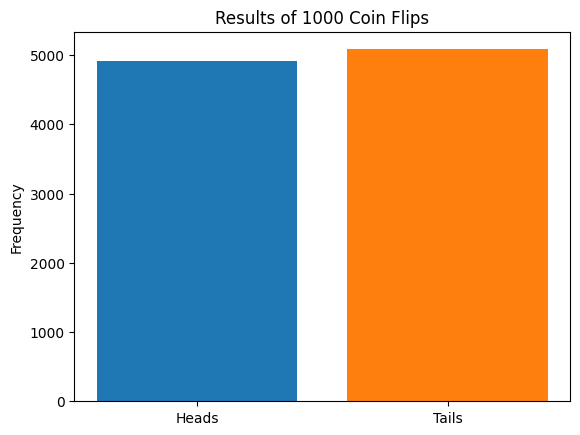

In [13]:
flips = np.random.choice(['Heads', 'Tails'], size=10000)

unique, counts = np.unique(flips, return_counts=True)
plt.bar(unique, counts, color=["#1f77b4", "#ff7f0e"])
plt.title("Results of 1000 Coin Flips")
plt.ylabel("Frequency")
plt.show()

Here, we told Python: “I want 1000 outcomes randomly chosen between ‘Heads’ and ‘Tails’, equally likely.” 
We have just sampled from a discrete uniform distribution.

#### Example 2: Stick Length (Continuous Sampling)
Now imagine that you find a stick and you want to measure its length, so you take a tape measurer and take 1000 precise measurements of this stick and plot them. Again, since this would take a really long time, we can easily just make a simulation in Python:

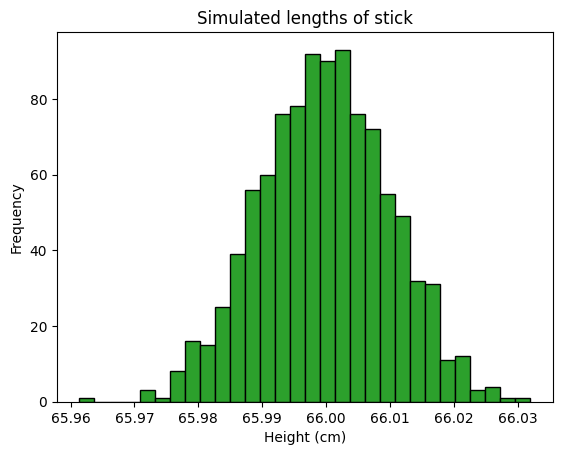

In [14]:
heights = np.random.normal(loc=66, scale=.01, size=1000)

plt.hist(heights, bins=30, color="#2ca02c", edgecolor="black")
plt.title("Simulated lengths of stick")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.show()

Here, we told Python: “I want 1000 lengths randomly chosen from measuring a stick with an average of 66 cm.” We have just sampled from a continuous random variable (normally distributed).

### Concept 2: Sampling from a Normal Distribution

The normal (Gaussian) distribution is defined by its mean (mu) and standard deviation (sigma). Here we generate 1000 samples from a normal distribution with mean 0 and std deviation 1.

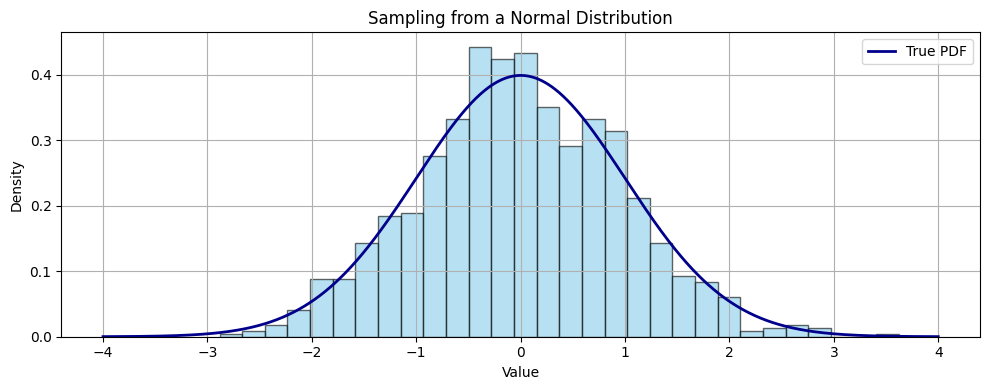

In [15]:

mu, sigma = 0, 1
normal_samples = np.random.normal(mu, sigma, 1000)


plt.figure(figsize=(10, 4))
plt.hist(normal_samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
x = np.linspace(-4, 4, 1000)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)),
         color='darkblue', lw=2, label='True PDF')
plt.title('Sampling from a Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Concept 3: Sampling from an Arbitrary PDF

Python and other tools provide optimized implementation for working with common probability distributions. However, when dealing with a custom probability density function (PDF), what do you do?  

   __DEMO__:
For example:

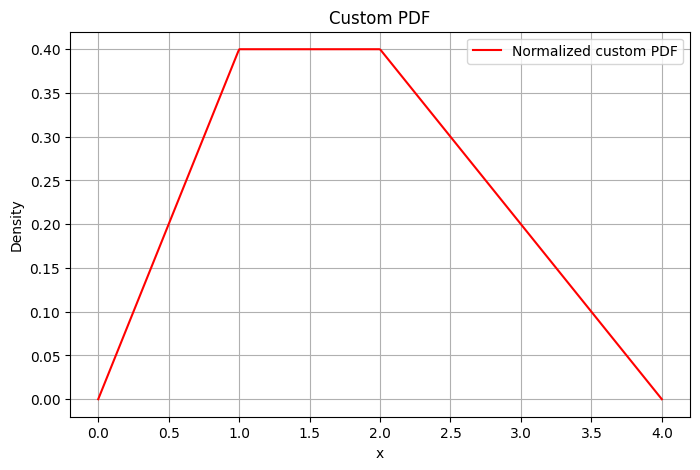

In [16]:
def arbitrary_func(x):
    if x>=0 and x<=1:
        return x
    if x>1 and x<=2:
        return 1
    if x>2 and x<=4:
        return (-(x/2))+2
    if x<0 or x>4:
        return 0

def normalized_pdf(x):
    return arbitrary_func(x) / 2.5



x_vals = np.linspace(0, 4, 500)
pdf_vals = [normalized_pdf(x) for x in x_vals]

plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, 'r-', label='Normalized custom PDF')
plt.title('Custom PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Solution: leverage existing tools for a generic approach to sample from __ANY__ distributions.

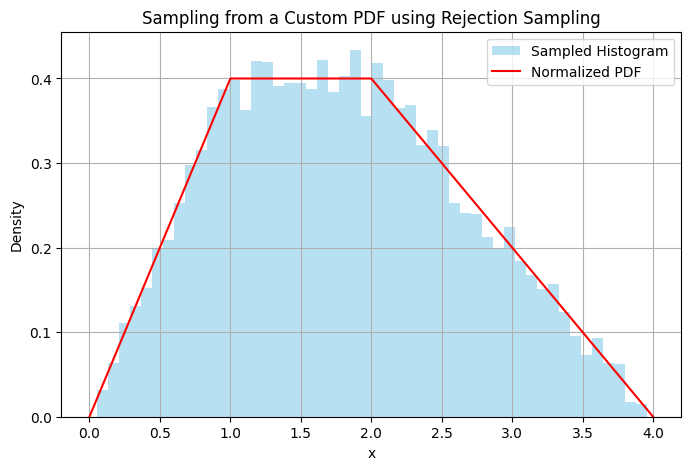

In [17]:
def sample_from_pdf(n_samples, x_min=0, x_max=4, y_max=1/2.5):
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(0, y_max)
        if y <= normalized_pdf(x):
            samples.append(x)
    return np.array(samples)

# Generate samples
samples = sample_from_pdf(10000)

# Plot histogram of samples
x_vals = np.linspace(0, 4, 500)
pdf_vals = [normalized_pdf(x) for x in x_vals]

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', label='Sampled Histogram')
plt.plot(x_vals, pdf_vals, 'r-', label='Normalized PDF')
plt.title('Sampling from a Custom PDF using Rejection Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()